In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt

In [3]:
df = pd.read_csv('../LC/Lending_Club_Accepted_2014_2018.csv')
df.head()

/var/folders/5p/n3sbx2sd4z9d26_4552pvds00000gn/T/ipykernel_6057/2154752155.py:1: DtypeWarning: Columns (19,59,118,129,130,131,134,135,136,139,145,146,147) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../LC/Lending_Club_Accepted_2014_2018.csv')


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,68407277,NaN,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,C4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,68355089,NaN,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,C1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,68341763,NaN,20000.0,20000.0,20000.0,60 months,10.78,432.66,B,B4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,66310712,NaN,35000.0,35000.0,35000.0,60 months,14.85,829.90,C,C5,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,68476807,NaN,10400.0,10400.0,10400.0,60 months,22.45,289.91,F,F1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df_accepted = df.copy()

In [5]:
df_accepted['issue_d'] = pd.to_datetime(df['issue_d'], format="%b-%Y").dt.to_period('M')

In [6]:
monthly_approved_loan = df_accepted.groupby('issue_d').count()['id']
monthly_approved_loan

issue_d
2014-01    15628
2014-02    15269
2014-03    16513
2014-04    19071
2014-05    19099
2014-06    17179
2014-07    29306
2014-08    18814
2014-09    10606
2014-10    38783
2014-11    25054
2014-12    10307
2015-01    35107
2015-02    23770
2015-03    25400
2015-04    35427
2015-05    31913
2015-06    28485
2015-07    45962
2015-08    35886
2015-09    28641
2015-10    48631
2015-11    37530
2015-12    44343
2016-01    32366
2016-02    39529
2016-03    61992
2016-04    36432
2016-05    28403
2016-06    33019
2016-07    34696
2016-08    36280
2016-09    28144
2016-10    32772
2016-11    34591
2016-12    36183
2017-01    31835
2017-02    27763
2017-03    37181
2017-04    29683
2017-05    37681
2017-06    38087
2017-07    39415
2017-08    43573
2017-09    39713
2017-10    38151
2017-11    42343
2017-12    38154
2018-01    36347
2018-02    32746
2018-03    38771
2018-04    42928
2018-05    46311
2018-06    41533
2018-07    43089
2018-08    46079
2018-09    39026
2018-10    46305
2018-1

In [7]:
df_not_accepted = pd.read_csv('../LC/Lending_Club_Rejected_2014_2018.csv')
df_not_accepted.head()

,Amount_Requested,Application_Date,Loan_Title,Risk_Score,Debt_to_Income_Ratio,Zip_Code,State,Employment_Length,Policy_Code
0,1000.0,2016-04-01,other,NaN,2.69%,331xx,FL,< 1 year,0.0
1,4000.0,2016-04-01,debt_consolidation,NaN,28.26%,834xx,ID,< 1 year,0.0
2,5000.0,2016-04-01,moving,NaN,-1%,648xx,MO,NaN,0.0
3,1000.0,2016-04-01,moving,628.0,21.43%,380xx,TN,< 1 year,0.0
4,3000.0,2016-04-01,Debt consolidation,NaN,8.49%,895xx,NV,2 years,2.0


In [8]:
df_not_accepted['Application_Date'] = pd.to_datetime(df_not_accepted['Application_Date'])

In [9]:
df_not_accepted['Application_Date'] = df_not_accepted['Application_Date'].dt.to_period('M')

In [10]:
df_not_accepted['count'] = 1

In [11]:
monthly_rejected_loan = df_not_accepted.groupby('Application_Date').count()['count']
monthly_rejected_loan

Application_Date
2014-01    110063
2014-02     94421
2014-03    127394
2014-04    141758
2014-05    146701
2014-06    168237
2014-07    237232
2014-08    203221
2014-09    192251
2014-10    195650
2014-11    147887
2014-12    168885
2015-01    211743
2015-02    155639
2015-03    194660
2015-04    209217
2015-05    232100
2015-06    225987
2015-07    263732
2015-08    234307
2015-09    232508
2015-10    288981
2015-11    295726
2015-12    314779
2016-01    334928
2016-02    318850
2016-03    442426
2016-04    386183
2016-05    247300
2016-06    363078
2016-07    412072
2016-08    456196
2016-09    404351
2016-10    449300
2016-11    483070
2016-12    472120
2017-01    489828
2017-02    409786
2017-03    480142
2017-04    474768
2017-05    587641
2017-06    602900
2017-07    686011
2017-08    663421
2017-09    657589
2017-10    690301
2017-11    707586
2017-12    622600
2018-01    668618
2018-02    553228
2018-03    653288
2018-04    746146
2018-05    896421
2018-06    799414
2018-07    

In [12]:
monthly_percentage_accepted_loan = monthly_approved_loan / (monthly_approved_loan + monthly_rejected_loan) * 100
monthly_percentage_accepted_loan = monthly_percentage_accepted_loan.apply(lambda x: float("{:.2f}".format(x)))
monthly_percentage_accepted_loan

issue_d
2014-01    12.43
2014-02    13.92
2014-03    11.47
2014-04    11.86
2014-05    11.52
2014-06     9.27
2014-07    11.00
2014-08     8.47
2014-09     5.23
2014-10    16.54
2014-11    14.49
2014-12     5.75
2015-01    14.22
2015-02    13.25
2015-03    11.54
2015-04    14.48
2015-05    12.09
2015-06    11.19
2015-07    14.84
2015-08    13.28
2015-09    10.97
2015-10    14.40
2015-11    11.26
2015-12    12.35
2016-01     8.81
2016-02    11.03
2016-03    12.29
2016-04     8.62
2016-05    10.30
2016-06     8.34
2016-07     7.77
2016-08     7.37
2016-09     6.51
2016-10     6.80
2016-11     6.68
2016-12     7.12
2017-01     6.10
2017-02     6.35
2017-03     7.19
2017-04     5.88
2017-05     6.03
2017-06     5.94
2017-07     5.43
2017-08     6.16
2017-09     5.70
2017-10     5.24
2017-11     5.65
2017-12     5.77
2018-01     5.16
2018-02     5.59
2018-03     5.60
2018-04     5.44
2018-05     4.91
2018-06     4.94
2018-07     4.77
2018-08     4.88
2018-09     4.51
2018-10     4.81
2018-1

Text(0, 0.5, 'Approval Ratio (% of Loan Requests)')

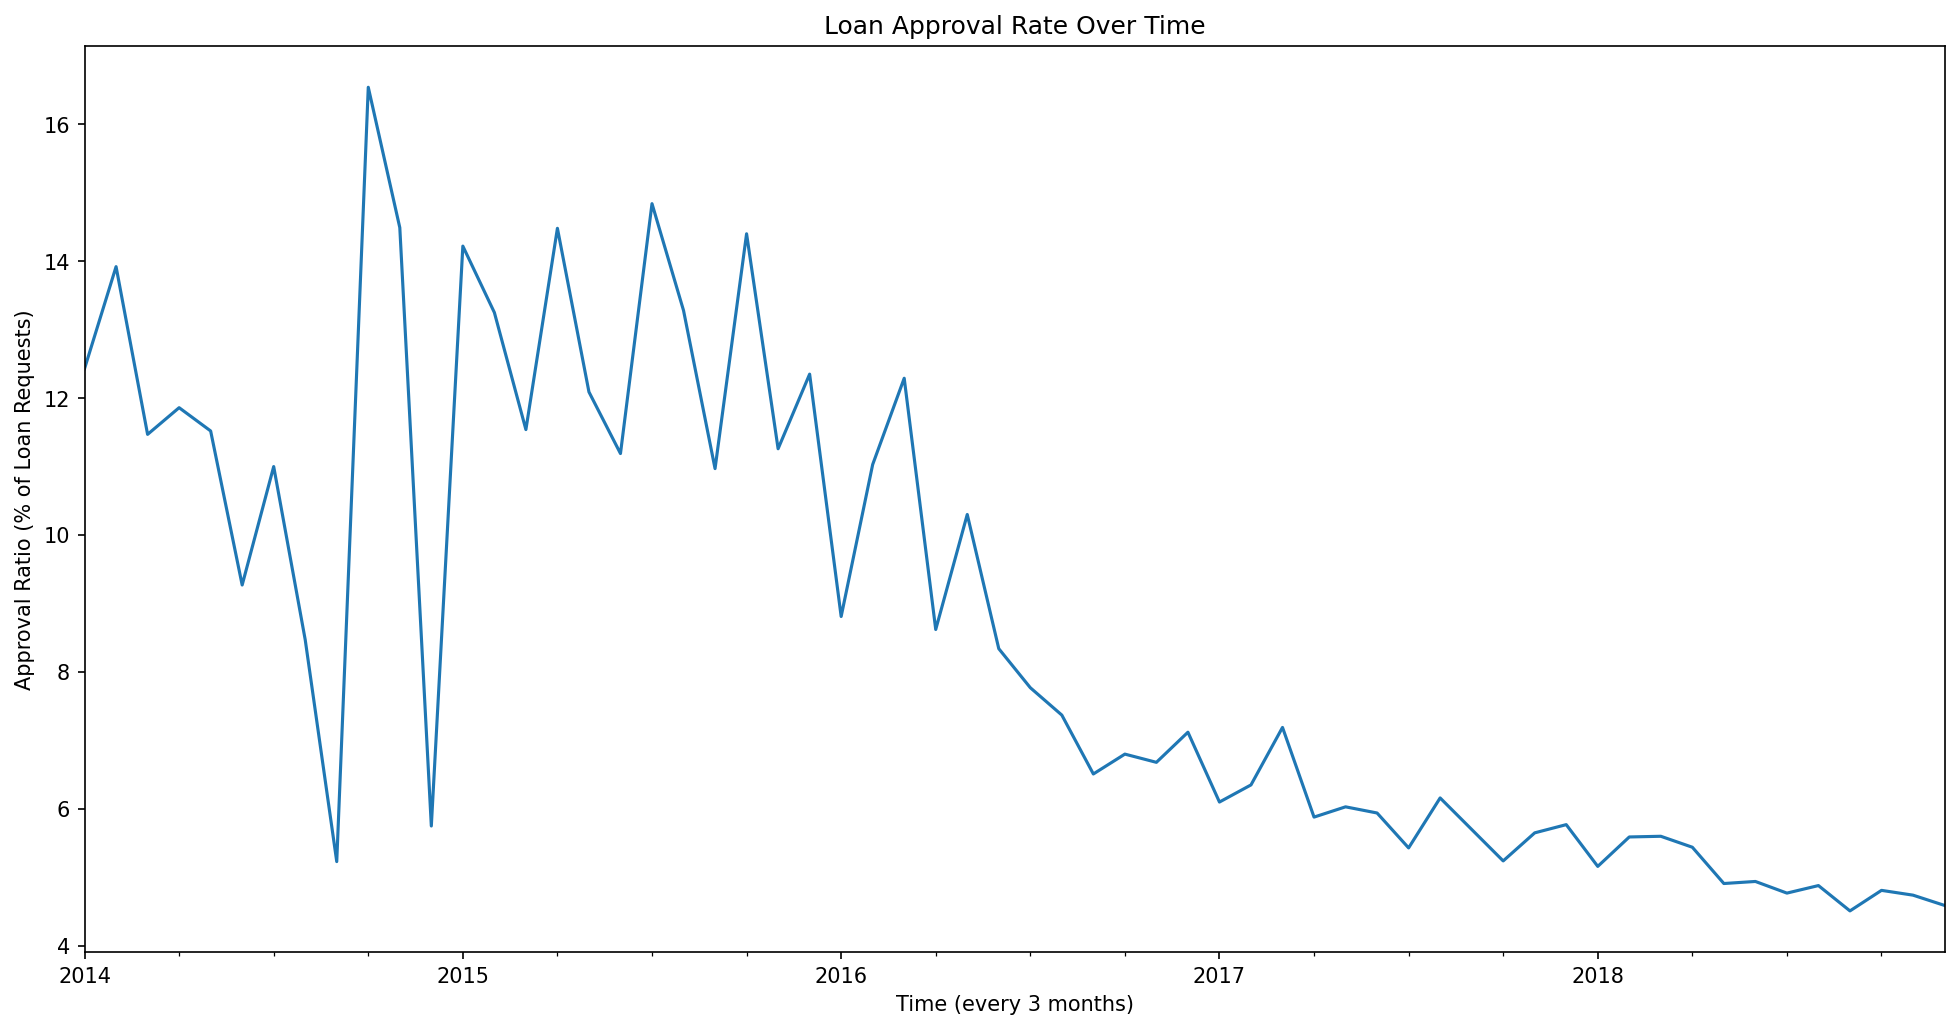

In [13]:
plt.figure(figsize=(16, 8), dpi=150)

monthly_percentage_accepted_loan.plot()

plt.title('Loan Approval Rate Over Time')
plt.xlabel('Time (every 3 months)')
plt.ylabel(r'Approval Ratio (% of Loan Requests)')